In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load results_summary.txt file

In [2]:
results_name = "/media/common/toy/results_summary.txt"
configs_name = "/media/common/toy/configs_sorted.txt"
results_file = open(results_name,'r+')
results_lines= results_file.read().splitlines()

In [3]:
metrics = results_lines[3].split('|')[1:]
col_names = [m.strip() for m in metrics]
col_names_all = []
for i,name in enumerate(col_names):
    col_names_all.append(name)
    col_names_all.append(name+'_stderr')
col_names_all.insert(0,'idx')

In [4]:
col_names_all

['idx',
 'Pehe',
 'Pehe_stderr',
 'Bias_ate',
 'Bias_ate_stderr',
 'Rmse_fact',
 'Rmse_fact_stderr',
 'Rmse_ite',
 'Rmse_ite_stderr',
 'Objective',
 'Objective_stderr',
 'Pehe_nn',
 'Pehe_nn_stderr',
 'Bias_ate_IPW',
 'Bias_ate_IPW_stderr',
 'Bias_ate_TIPW',
 'Bias_ate_TIPW_stderr',
 'Bias_ate_MW',
 'Bias_ate_MW_stderr',
 'Bias_ate_OW',
 'Bias_ate_OW_stderr',
 'Pehe_IPW',
 'Pehe_IPW_stderr',
 'Pehe_TIPW',
 'Pehe_TIPW_stderr',
 'Pehe_MW',
 'Pehe_MW_stderr',
 'Pehe_OW',
 'Pehe_OW_stderr']

In [5]:
breaks = []
for i,line in enumerate(results_lines):
    if(line==''):
        breaks.append(i)

train_idx = range(5,breaks[0])
val_idx = range(breaks[0]+4,breaks[1])
test_idx = range(breaks[1]+4,breaks[2])

train_results = [results_lines[i] for i in train_idx]
val_results = [results_lines[i] for i in val_idx]
test_results = [results_lines[i] for i in test_idx]

In [6]:
len(train_results),len(val_results),len(test_results)

(1080, 1080, 1080)

In [7]:
def process_result(result):
    result_processed = []
    result_arr = result.split('|')
    result_processed.append(int(result_arr[0].strip()))
    for r in result_arr[1:]:
        arr = r.split('(')
        result_processed.append(float(arr[0].strip()))
        result_processed.append(float(arr[1].split(')')[0]))
    return result_processed

In [8]:
def make_df(col_names_all,results):
    d = []
    for result in train_results:
        arr = process_result(result)
        d.append(arr)
    return pd.DataFrame(d,columns=col_names_all)

In [9]:
train_df = make_df(col_names_all,train_results)
val_df = make_df(col_names_all,val_results)
test_df = make_df(col_names_all,test_results)

In [10]:
train_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Objective,...,Bias_ate_OW,Bias_ate_OW_stderr,Pehe_IPW,Pehe_IPW_stderr,Pehe_TIPW,Pehe_TIPW_stderr,Pehe_MW,Pehe_MW_stderr,Pehe_OW,Pehe_OW_stderr
0,704,0.256,0.023,0.178,0.036,1.012,0.007,1.035,0.008,1.309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274,0.205,0.012,0.105,0.027,1.000,0.006,1.013,0.006,1.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,208,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.101,0.027,0.193,0.014,0.193,0.014,0.189,0.014,0.191,0.014
3,859,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.101,0.027,0.193,0.014,0.193,0.014,0.189,0.014,0.191,0.014
4,126,0.181,0.012,0.074,0.021,0.992,0.006,1.006,0.006,2.161,...,0.075,0.021,0.181,0.012,0.181,0.012,0.176,0.011,0.179,0.011


# load configs_sorted.txt file

In [11]:
configs_name = "/media/common/toy/configs_sorted.txt"
configs_file = open(configs_name,'r+')
configs_lines= configs_file.read().splitlines()

In [12]:
def process_config(config):
    arr = config.split(',')
    d = {}
    for el in arr:
        k,v = el.split('=')
        try:
            v = float(v)
        except:
            v = v
        d[k.strip()] = v
    return d

l = []
for config in configs_lines:
    l.append(list(process_config(config).values()))
    
l = list(map(list, zip(*l)))

In [13]:
col_names = list(process_config(configs_lines[0]).keys())

In [14]:
col_names

['datadir', 'p_alpha', 'weight_scheme']

In [15]:
for i,el in enumerate(l):
    train_df[col_names[i]] = el
    val_df[col_names[i]] = el
    test_df[col_names[i]] = el

In [16]:
train_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Objective,...,Pehe_IPW_stderr,Pehe_TIPW,Pehe_TIPW_stderr,Pehe_MW,Pehe_MW_stderr,Pehe_OW,Pehe_OW_stderr,datadir,p_alpha,weight_scheme
0,704,0.256,0.023,0.178,0.036,1.012,0.007,1.035,0.008,1.309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,../datasets/toy_data/C_0.5/,10.0,JW
1,274,0.205,0.012,0.105,0.027,1.000,0.006,1.013,0.006,1.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,../datasets/toy_data/C_0.0/,10.0,JW
2,208,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.014,0.193,0.014,0.189,0.014,0.191,0.014,../datasets/toy_data/A_0.0/,10.0,OW
3,859,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.014,0.193,0.014,0.189,0.014,0.191,0.014,../datasets/toy_data/B_0.0/,10.0,OW
4,126,0.181,0.012,0.074,0.021,0.992,0.006,1.006,0.006,2.161,...,0.012,0.181,0.012,0.176,0.011,0.179,0.011,../datasets/toy_data/B_0.0/,10.0,ParetoIPW


In [17]:
def add_sc_gamma(df):
    datadirs = df['datadir']
    l = []
    for d in datadirs:
        sc_gamma = d.split('/')[-2]
        sc = sc_gamma.split('_')[0]
        gamma = float(sc_gamma.split('_')[1])
        l.append([sc,gamma])
        
    l = list(map(list, zip(*l)))
    df['sc'] = l[0]
    df['gamma'] = l[1]

In [18]:
add_sc_gamma(train_df)
add_sc_gamma(val_df)
add_sc_gamma(test_df)

In [19]:
train_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Objective,...,Pehe_TIPW_stderr,Pehe_MW,Pehe_MW_stderr,Pehe_OW,Pehe_OW_stderr,datadir,p_alpha,weight_scheme,sc,gamma
0,704,0.256,0.023,0.178,0.036,1.012,0.007,1.035,0.008,1.309,...,NaN,NaN,NaN,NaN,NaN,../datasets/toy_data/C_0.5/,10.0,JW,C,0.5
1,274,0.205,0.012,0.105,0.027,1.000,0.006,1.013,0.006,1.088,...,NaN,NaN,NaN,NaN,NaN,../datasets/toy_data/C_0.0/,10.0,JW,C,0.0
2,208,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.014,0.189,0.014,0.191,0.014,../datasets/toy_data/A_0.0/,10.0,OW,A,0.0
3,859,0.193,0.014,0.100,0.027,1.001,0.006,1.012,0.007,0.577,...,0.014,0.189,0.014,0.191,0.014,../datasets/toy_data/B_0.0/,10.0,OW,B,0.0
4,126,0.181,0.012,0.074,0.021,0.992,0.006,1.006,0.006,2.161,...,0.012,0.176,0.011,0.179,0.011,../datasets/toy_data/B_0.0/,10.0,ParetoIPW,B,0.0


In [20]:
#TODO: check above code for indexing errors (e.g. a lot of the row metric values are the same in the above cell)
#TODO: make plots

# Plots with fixed alpha

TODO: 
- Think of what plots would be most informative here

Notes:
- alpha here is the "strength" of the IPM term in the loss
- gamma controls level of overlap between treatment and control
- scenarios (the variable sc) A,B,C control level of confounding

Text(0.5, 1.0, 'scenario:A, alpha=10.0')

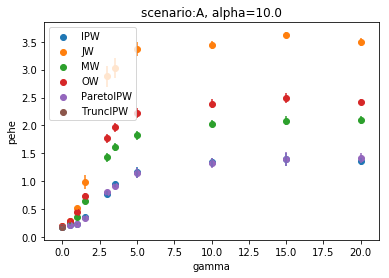

In [21]:
groups = test_df.groupby(['weight_scheme','sc','p_alpha'])
sc = 'A'
alpha = 10.00
for weight_scheme in np.unique(test_df['weight_scheme']):
    subdf = groups.get_group((weight_scheme,sc,alpha))
    plt.scatter(subdf['gamma'],subdf['Pehe'])
    plt.errorbar(subdf['gamma'],subdf['Pehe'],yerr=subdf['Pehe_stderr'],fmt='none')
plt.legend(np.unique(test_df['weight_scheme']))
plt.xlabel('gamma')
plt.ylabel('pehe')
plt.title('scenario:{}, alpha={}'.format(sc,alpha))

Text(0.5, 1.0, 'scenario:C, alpha=10.0')

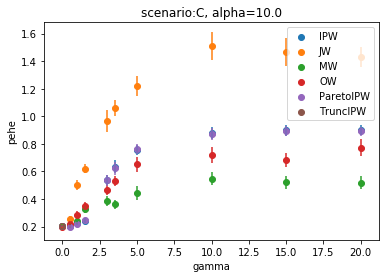

In [22]:
sc = 'C'
alpha = 10.00
for weight_scheme in np.unique(test_df['weight_scheme']):
    subdf = groups.get_group((weight_scheme,sc,alpha))
    plt.scatter(subdf['gamma'],subdf['Pehe'])
    plt.errorbar(subdf['gamma'],subdf['Pehe'],yerr=subdf['Pehe_stderr'],fmt='none')
plt.legend(np.unique(test_df['weight_scheme']))
plt.xlabel('gamma')
plt.ylabel('pehe')
plt.title('scenario:{}, alpha={}'.format(sc,alpha))

In [26]:
# Take the min over alpha of pehe for each weight scheme

# Min plots

In [66]:
def make_plot(sc,metric,df):
    # Plot TruncIPW once fixed
    groups = df.groupby(['weight_scheme','sc','gamma'])
    for weight_scheme in np.unique(df['weight_scheme']):
        if(weight_scheme=='TruncIPW'):
            continue
        all_vals = [groups.get_group((weight_scheme,sc,gamma))[metric] for gamma in np.unique(df['gamma'])]
        all_errs = [groups.get_group((weight_scheme,sc,gamma))[metric+'_stderr'] for gamma in np.unique(df['gamma'])]
        argmins = [np.argmin(all_vals[i]) for i in range(len(all_vals))]
        mins = [all_vals[i][argmins[i]] for i in range(len(all_vals))]
        errs = [all_errs[i][argmins[i]] for i in range(len(all_errs))]
        plt.scatter(np.unique(df['gamma']),mins)
        plt.errorbar(np.unique(df['gamma']),mins,yerr=errs,fmt='none')
    weight_schemes = np.unique(df['weight_scheme'])
    plt.legend(weight_schemes[weight_schemes!='TruncIPW'])
    plt.xlabel('gamma')
    plt.ylabel(metric)
    plt.title('scenario:{}'.format(sc))

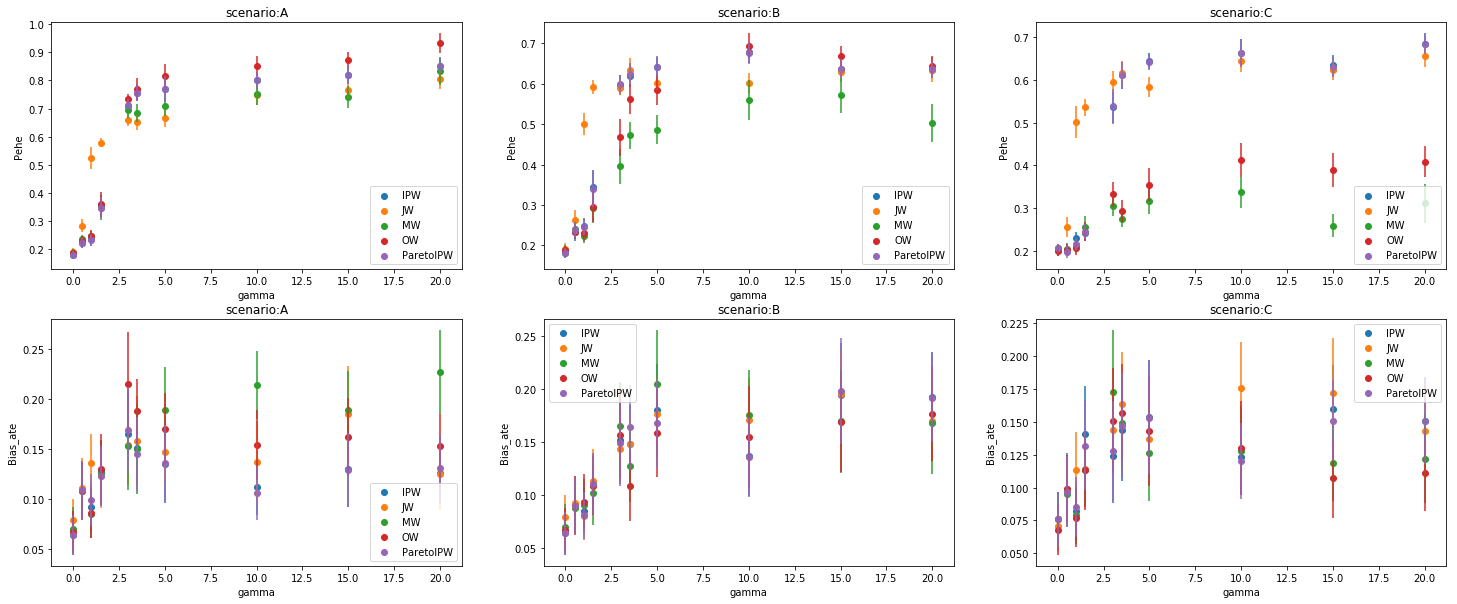

In [67]:
plt.figure(figsize=(25,10))
i = 0
for metric in ['Pehe','Bias_ate']:
    for sc in ['A','B','C']:
        plt.subplot(2,3,i+1)
        make_plot(sc,metric,test_df)
        i+=1